# Sumário

>- 1.....................................................Preparação inicial dos dados.
>
>   - 1.1........................................Importação de bibliotecas.
>
>   - 1.2........................................Definições e funções.
>
>   - 1.3........................................Importação dos DataSets.
>
>   - 1.4........................................Tratamento dos dados (tradução e One Hot Encoding).
>    
>- 2.....................................................Planejamento dos Modelos.
>
>   - 2.1........................................O que queremos prever de fato ?
>
>   - 2.2........................................O que será feito, e como ?
>
>   - 2.3........................................Expectativa e próximos passos.
>
>- 3.....................................................Relação da EDA com a escolha das variáveis.
>
>- 4.....................................................Implementação dos Modelos.
>
>   - 4.1........................................Regressão Linear.
>
>   - 4.2........................................Árvore de Decisão.
>
>   - 4.3........................................KNN (K-Vizinhos mais Próximos).
>
>   - 4.4........................................Gradient Boosting.
>
>   - 4.5........................................Light GBM.
>
>- 5.....................................................Resultados e Métricas.

### Imagens

> Imagem 1...............................................Mapa de Calor - Correlação das notas de Matemática com escola, internet e ingresso em ensino superior.
>
> Imagem 2...............................................Mapa de Calor - Correlação das notas de Português com escola, internet e ingresso em ensino superior.
>
> Imagem 3...............................................Tabela - Resultados e métricas dos Modelos treinados.

# 1 Preparação inicial dos dados

### 1.1 - Importação de bibliotecas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import lightgbm as lgbm

### 1.2 - Definições e funções

In [3]:
def pred_decision_tree(df, X, y):

    X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X_train, y_train)
    Y_pred_tree = tree.predict(X_test)
    mse_tree = mean_squared_error(y_test, Y_pred_tree)

    return mse_tree

In [4]:
def showHeatmap(df, subject, colorPallete, index):
    plt.figure(figsize=(10,6))
    num = df.select_dtypes(include=['float', 'int'])
    corr = num.corr()
    matrix = np.triu(corr)
    sns.heatmap(corr, annot=True, cmap=colorPallete, mask=matrix)
    plt.title("Mapa de Calor de Correlações - " + subject, fontsize=15)
    plt.xticks(rotation=35)
    plt.yticks(rotation=0)
    plt.show()
    print("\t\tImagem " + str(index) + " - Mapa de Calor - Correlação das notas de " + subject + " com escola, internet e ingresso em ensino superior.")
    print("\n")

In [5]:
def pred_linear_regression(df, X, y):

    X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [6]:
def pred_gradient_boosting_regression(df, X, y):

    X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

    gboost = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gboost.fit(X_train, y_train)

    Y_pred_gboost = gboost.predict(X_test)

    mse_gboost = mean_squared_error(y_test, Y_pred_gboost)
    return mse_gboost

In [7]:
def pred_knn_regression(df, X, y):

    X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)

    # Fazer previsões
    Y_pred_knn = knn.predict(X_test_scaled)

    # Avaliação do modelo
    mse_knn = mean_squared_error(y_test, Y_pred_knn)
    return mse_knn

In [8]:
def pred_light_gbm(df, X, y):

    X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.2, random_state=42)

    lgb_model = lgbm.LGBMRegressor(n_estimators=100, random_state=42, verbosity=-1)
    lgb_model.fit(X_train, y_train)

    Y_pred_lgb = lgb_model.predict(X_test)

    mse_lgb = mean_squared_error(y_test, Y_pred_lgb)
    return mse_lgb

In [9]:
df_names = ['Matemática', 'Português']

coefs = pd.DataFrame({
    'materia': [],
    'modelo': [],
    'x': [],
    'variavel_target': [],
    'mse': [],
    'r2': [],
})

### 1.3 - Importação dos DataSets

In [10]:
df_mat = pd.read_csv("data/student-mat.csv", sep=';')
df_por = pd.read_csv("data/student-por.csv", sep=';')
dfs = [df_mat, df_por]

### 1.4 - Tratamento dos dados (tradução e One Hot Encoding)

In [11]:
for i in (dfs):
    i['Pstatus'] = i['Pstatus'].str.replace("A", "S").str.replace("T", "J")
    i['sex'] = i['sex'].str.replace("M", "Masculino").str.replace("F", "Feminino")
    i['address'] = i['address'].str.replace("R", "Rural").str.replace("U", "Urbano")
    i['Mjob'] = i['Mjob'].str.replace("at_home", "Lar").str.replace("health", "Saude").str.replace("other", "Outro").str.replace("services", "Func. Publico").str.replace("teacher", "Professor")
    i['Fjob'] = i['Fjob'].str.replace("at_home", "Lar").str.replace("health", "Saude").str.replace("other", "Outro").str.replace("services", "Func. Publico").str.replace("teacher", "Professor")
    i['reason'] = i['reason'].str.replace("home", "Local").str.replace("reputation", "Reputacao").str.replace("course", "Curso").str.replace("other", "Outro")
    i['guardian'] = i['guardian'].str.replace("mother", "Mae").str.replace("father", "Pai").str.replace("other", "Outro")

    i['schoolsup'] = i['schoolsup'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['famsup'] = i['famsup'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['paid'] = i['paid'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['activities'] = i['activities'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['nursery'] = i['nursery'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['higher'] = i['higher'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['internet'] = i['internet'].str.replace("yes", "Sim").str.replace("no", "Nao")
    i['romantic'] = i['romantic'].str.replace("yes", "Sim").str.replace("no", "Nao")

In [12]:
dfs[0] = pd.get_dummies(df_mat, columns=['school', 'higher', 'internet'])
dfs[1] = pd.get_dummies(df_por, columns=['school', 'higher', 'internet'])

for i in dfs:
    i['school_GP'] = i['school_GP'].astype(int)
    i['school_MS'] = i['school_MS'].astype(int)
    i['higher_Nao'] = i['higher_Nao'].astype(int)
    i['higher_Sim'] = i['higher_Sim'].astype(int)
    i['internet_Nao'] = i['internet_Nao'].astype(int)
    i['internet_Sim'] = i['internet_Sim'].astype(int)

df_mat = dfs[0].copy()
df_por = dfs[1].copy()

# 2 - Planejamento dos Modelos

##### Com os dados analisados e algumas conclusões feitas, o próximo passo é utilizar modelos de Machine Learning com o objetivo de prever as notas dos alunos com base em algumas características.

##### Por exemplo, vimos que tempo de estudo e escola estão correlacionadas com as notas, com base nisso, o quão bem podemos prever a nota que um aluno vai ter, se soubermos apenas o quanto tempo ele estuda e qual escola ele estuda ? Esta é o principal questionamento que vamos responder nesta etapa.

### 2.1 - O que queremos prever de fato ?

##### Queremos prever a variável G1 e G2 (nota do 1º e 2º Trimestre, respectivamente) com base em algumas variáveis, e também confirmar o quão bem podemos prever a variável G3 (nota final) com base nas outras 2 notas.

#### Variáveis a serem usadas nos modelos:
- *failures* - Quantas vezes o aluno repetiu de ano.
- *studytime* - Quantas horas o aluno passa estudando.
- *school* - Qual escola o aluno estuda.
- *Fedu* / *Medu* - Nível de educação da mãe e do pai.
- *higher* - Se o aluno deseja ingressar num Ensino Superior.
- *internet* - Se o aluno tem acesso à internet.

#### Variáveis que não serão usadas nos modelos:
- *traveltime* - Tempo que o aluno gasta se deslocando até a escola.
- *famrel* - O quão boa é a relação familiar do aluno.
- *goout* - O quão frequente ele sai com os amigos.
- *health* - Saúde do aluno.
- *absences* - Quantas vezes o aluno faltou.
- *schoolsup* - Se o aluno teve suporte escolar.
- *address* - Tipo de endereço que o aluno mora.
- *famsize* - Tamanho da família.

### 2.2 - O que será feito, e como ?

##### Vamos utilizar Modelos Supervisionados para previsão, isto é, um modelo onde já temos a resposta (no caso as notas), dividiremos os dados em 2 blocos: Treino e Teste, um bloco será usado para treinar o algoritmo, e o outro bloco será usado para testarmos o quão precisa foram as previsões do modelo.

#### Modelos a serem utilizados:
- *Regressão Linear*
- *Árvore de Decisão*
- *K - Vizinhos mais Próximos*
- *Gradient Boosting*
- *Light GBM*

### 2.3 - Expectativa e próximos passos

##### Fazendo tudo isso, esperamos que os modelos identifiquem fatores-chave e apresentem uma precisão razoável na previsão das notas finais. Iremos captar as métricas e medições de acurácia dos modelos, para podermos avaliar qual deles está performando melhor e sendo mais pertinente para a nossa análise.

# 3 - Relação da EDA com a escolha das variáveis

##### Como foi visto na Análise Exploratória anteriormente, podemos fazer algumas seleções de quais features iremos incluir ou remover.

##### No item 2.1 acima, elencamos as variáveis à serem usadas: *failures* / *studytime* / *school* / *Fedu* / *Medu*

##### Vimos que essas variáveis tem uma correlação positiva com as notas, então serão incluídas nos modelos.

### Através das matrizes abaixo, alguns pontos muito importantes devem ser apontados:

- Alunos com o intuito de ingressar em um ensino superior geralmente tem uma nota um pouco maior.
- Alunos da escola Gabriel Pereira geralmente tem uma nota maior do que os alunos da escola Mousinho da Silveira.
- Coincidentemente, a escola Gabriel Pereira tem uma quantidade de alunos com acesso à internet maior do que a escola Mousinho da Silveira.

### Por causa destas observações, as variáveis *higher* / *internet* também serão inclusas nos modelos.

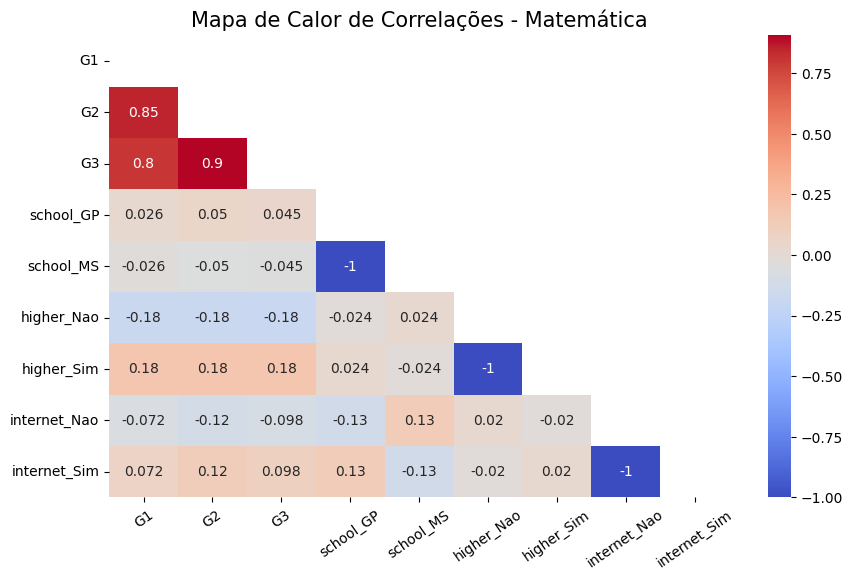

		Imagem 1 - Mapa de Calor - Correlação das notas de Matemática com escola, internet e ingresso em ensino superior.




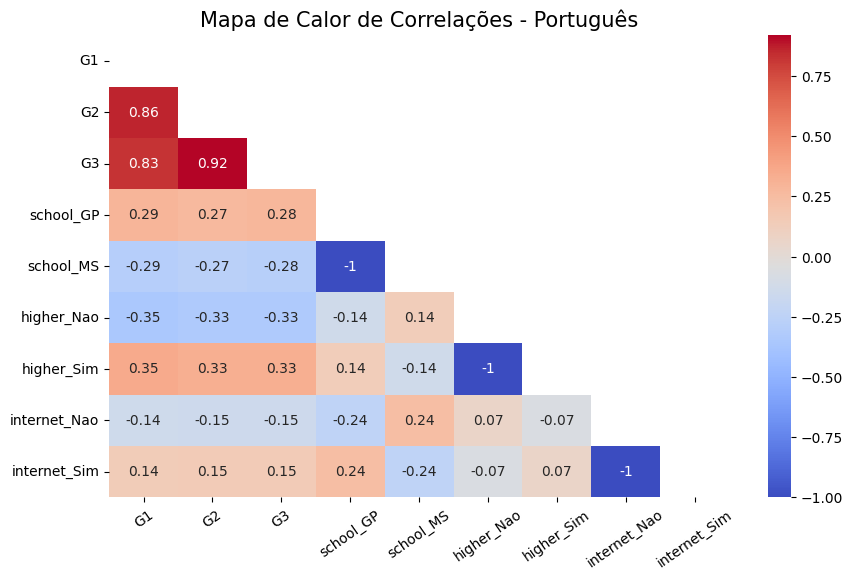

		Imagem 2 - Mapa de Calor - Correlação das notas de Português com escola, internet e ingresso em ensino superior.




In [13]:
df_mat_corr = df_mat.drop(columns=['age', 'address', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'])
df_por_corr = df_por.drop(columns=['age', 'address', 'famsize', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'])
corr_arr = [df_mat_corr, df_por_corr]
index = [1, 2]

for c, n, i in zip(corr_arr, df_names, index):
    showHeatmap(c, n, 'coolwarm', i)


# 4 - Implementação dos Modelos

##### Os modelos a serem treinados são os que já foram mencionados no item 2.2

##### Abaixo contem o código que os executa

##### Importante observar que em cada execução, é gerada um resultado e métricas de cada um, que são adicionados em uma tabela.

##### Essa tabela será o principal objeto de estudo na próxima etapa desta análise, onde iremos dar uma olhada mais afundo nessas métricas, o que elas significam, saber qual algoritmo conseguiu performar melhor e fazer as melhores previsões, assim como o oposto.

### 4.1 - Regressão Linear

In [14]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G1'
    mse_lr, r2_lr = pred_linear_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Regressao Linear', str(X), str(y), f'{mse_lr:.2f}', f'{r2_lr:.2f}']

In [15]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G2'
    mse_lr, r2_lr = pred_linear_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Regressao Linear', str(X), str(y), f'{mse_lr:.2f}', f'{r2_lr:.2f}']

In [16]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = ['G1', 'G2']
    mse_lr, r2_lr = pred_linear_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Regressao Linear', str(X), str(y), f'{mse_lr:.2f}', f'{r2_lr:.2f}']

In [17]:
for name, i in zip(df_names, dfs):
    X = ['G1', 'G2']
    y = 'G3'
    mse_lr, r2_lr = pred_linear_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Regressao Linear', str(X), str(y), f'{mse_lr:.2f}', f'{r2_lr:.2f}']

### 4.2 - Árvore de Decisão

In [18]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G1'
    mse_tree = pred_decision_tree(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Arvore de  Decisao', str(X), str(y), f'{mse_tree:.2f}', '-']

In [19]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G2'
    mse_tree = pred_decision_tree(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Arvore de  Decisao', str(X), str(y), f'{mse_tree:.2f}', '-']

In [20]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = ['G1', 'G2']
    mse_tree = pred_decision_tree(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Arvore de  Decisao', str(X), str(y), f'{mse_tree:.2f}', '-']

In [21]:
for name, i in zip(df_names, dfs):
    X = ['G1', 'G2']
    y = 'G3'
    mse_tree = pred_decision_tree(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Arvore de  Decisao', str(X), str(y), f'{mse_tree:.2f}', '-']

### 4.3 - KNN (K-Vizinhos mais Próximos)

In [22]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G1'
    mse_knn = pred_knn_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'KNN', str(X), str(y), f'{mse_knn:.2f}', '-']

In [23]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G1'
    mse_knn = pred_knn_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'KNN', str(X), str(y), f'{mse_knn:.2f}', '-']

In [24]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = ['G1', 'G2']
    mse_knn = pred_knn_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'KNN', str(X), str(y), f'{mse_knn:.2f}', '-']

In [25]:
for name, i in zip(df_names, dfs):
    X = ['G1', 'G2']
    y = 'G3'
    mse_knn = pred_knn_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'KNN', str(X), str(y), f'{mse_knn:.2f}', '-']

### 4.4 - Gradient Boosting

In [26]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G1'
    mse_gb = pred_gradient_boosting_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Gradient Boosting', str(X), str(y), f'{mse_gb:.2f}', '-']

In [27]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G2'
    mse_gb = pred_gradient_boosting_regression(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Gradient Boosting', str(X), str(y), f'{mse_gb:.2f}', '-']

In [28]:
for name, i in zip(df_names, dfs):
    X = ['G1', 'G2']
    y = 'G3'
    mse_gb = pred_decision_tree(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Gradient Boosting', str(X), str(y), f'{mse_gb:.2f}', '-']

### 4.5 - Light GBM

In [29]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G1'
    mse_lgbm = pred_light_gbm(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Light GBM', str(X), str(y), f'{mse_lgbm:.2f}', '-']

In [30]:
for name, i in zip(df_names, dfs):
    X = ['failures', 'studytime', 'Medu', 'Fedu', 'school_GP', 'school_MS', 'higher_Nao', 'higher_Sim', 'internet_Nao', 'internet_Sim']
    y = 'G2'
    mse_lgbm = pred_light_gbm(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Light GBM', str(X), str(y), f'{mse_lgbm:.2f}', '-']

In [31]:
for name, i in zip(df_names, dfs):
    X = ['G1', 'G2']
    y = 'G3'
    mse_lgbm = pred_light_gbm(i, X, y)
    coefs.loc[len(coefs)] = [name, 'Light GBM', str(X), str(y), f'{mse_lgbm:.2f}', '-']

# 5 - Resultados e Métricas

In [32]:
display(coefs)
print("\t\tImagem 3 - Tabela - Resultados e métricas dos Modelos treinados.")

,materia,modelo,x,variavel_target,mse,r2
0,Matemática,Regressao Linear,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...",G1,12.64,0.08
1,Português,Regressao Linear,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...",G1,7.14,0.17
2,Matemática,Regressao Linear,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...",G2,12.26,0.14
3,Português,Regressao Linear,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...",G2,7.43,0.17
4,Matemática,Regressao Linear,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...","['G1', 'G2']",12.45,0.11
5,Português,Regressao Linear,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...","['G1', 'G2']",7.28,0.17
6,Matemática,Regressao Linear,"['G1', 'G2']",G3,4.21,0.79
7,Português,Regressao Linear,"['G1', 'G2']",G3,1.37,0.86
8,Matemática,Arvore de Decisao,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...",G1,17.56,-
9,Português,Arvore de Decisao,"['failures', 'studytime', 'Medu', 'Fedu', 'sch...",G1,8.85,-


		Imagem 3 - Tabela - Resultados e métricas dos Modelos treinados.
